In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='latin')

In [3]:
df.sample(5)

,v1,v2
388,spam,4mths half price Orange line rental & latest c...
5525,ham,I want to tell you how bad I feel that basical...
4801,ham,Reverse is cheating. That is not mathematics.
3420,spam,Welcome! Please reply with your AGE and GENDER...
971,ham,"Haha awesome, omw back now then"


In [4]:
df.shape

(5572, 2)

1.data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [7]:
df.sample(5)

,target,message
4094,ham,I ain't answerin no phone at what is actually ...
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...
3930,ham,Nooooooo I'm gonna be bored to death all day. ...
4730,ham,K:)eng rocking in ashes:)
1548,ham,"Me, i dont know again oh"


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,message
5561,0,Get me out of this dump heap. My mom decided t...
5323,0,Aah bless! How's your arm?
4262,0,Den only weekdays got special price... Haiz......
3833,0,Watching tv lor. Nice one then i like lor.
3200,0,Nice.nice.how is it working?


In [11]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [12]:
df.duplicated().sum()

401

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5171, 2)

2.EDA

In [16]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar then Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4518
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

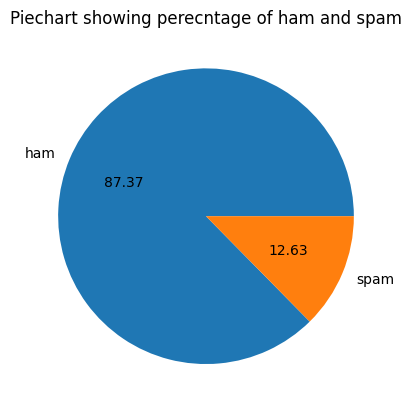

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("Piechart showing perecntage of ham and spam")
plt.show()

In [20]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tailo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
df['num_charecters']=df['message'].apply(len)

In [24]:
df.sample(5)

,target,message,num_charecters
4795,1,URGENT This is our 2nd attempt to contact U. Y...,136
5370,1,dating:i have had two of these. Only started a...,139
5367,0,Just trying to figure out when I'm suppose to ...,135
1738,0,K go and sleep well. Take rest:-).,34
4172,0,Ok... But they said i've got wisdom teeth hidd...,77


In [25]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.sample(5)

,target,message,num_charecters,num_words
1596,1,As a Registered Subscriber yr draw 4 a å£100 g...,146,31
5519,0,Can you pls send me that company name. In saib...,56,12
3668,0,Yeah imma come over cause jay wants to do some...,52,11
3955,0,Haha... dont be angry with yourself... Take it...,84,20
2205,0,"Haha, my legs and neck are killing me and my a...",132,32


In [27]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
4253,0,"How about clothes, jewelry, and trips?",38,9,1
1122,0,Ok.ok ok..then..whats ur todays plan,36,9,1
597,1,You have an important customer service announc...,86,15,2
4226,0,Buy one egg for me da..please:),31,10,1
1950,0,Oh ic. I thought you meant mary jane.,37,10,2


In [29]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,79.591568,18.606652,1.974280
std,58.591487,13.424824,1.466029
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#ham messages
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.131253,17.287074,1.829128
std,56.861084,13.618450,1.404481
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam messages
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.127106,27.736600,2.97856
std,29.910358,6.976813,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


<Axes: xlabel='num_charecters', ylabel='Count'>

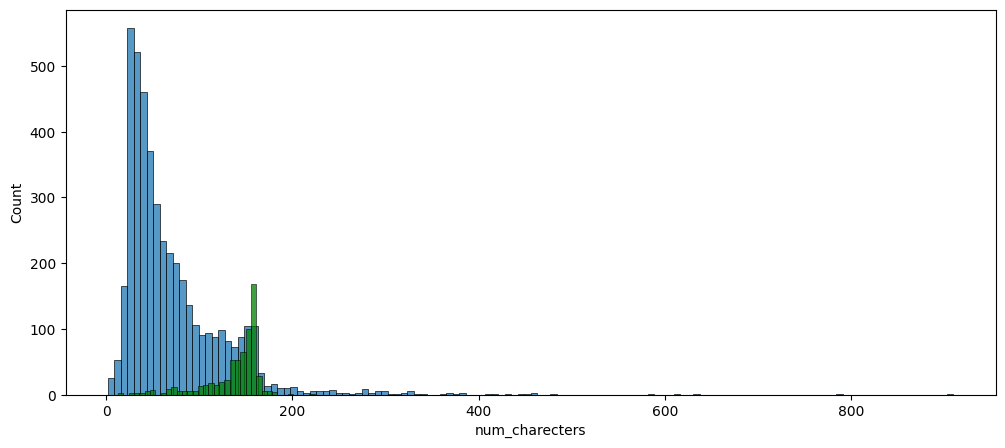

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

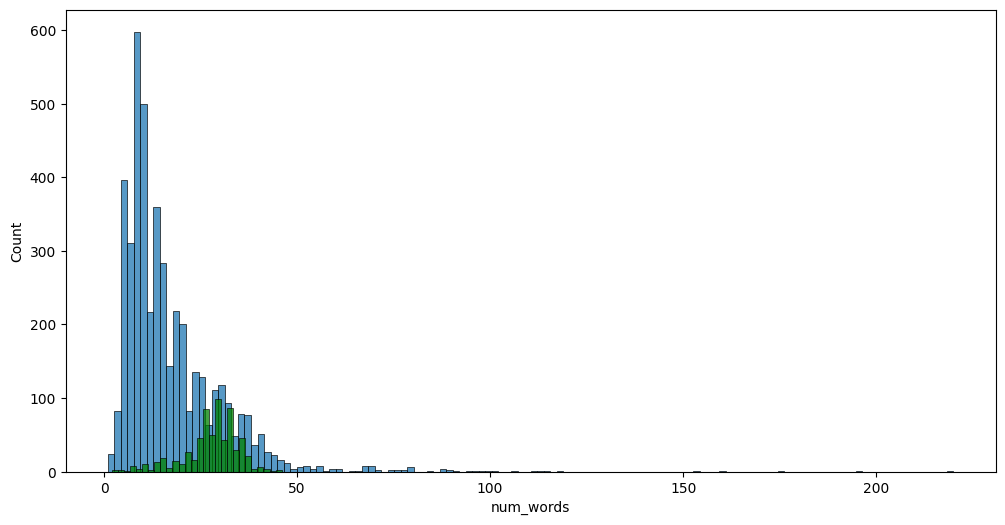

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

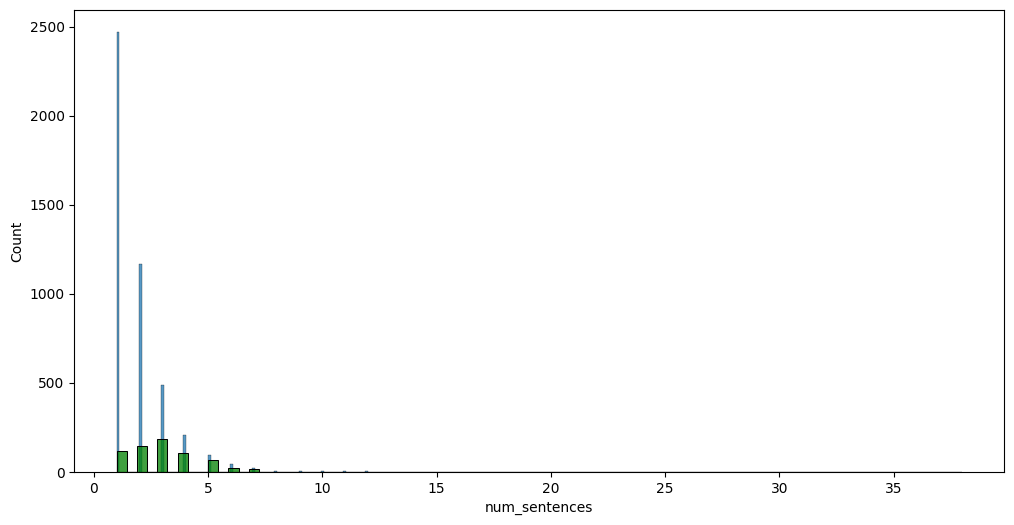

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='green')

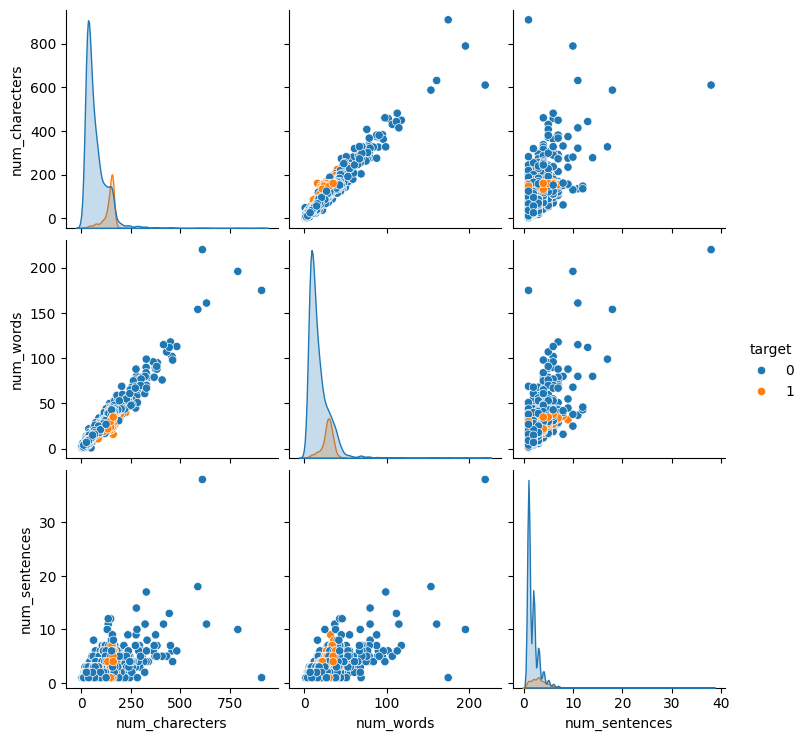

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

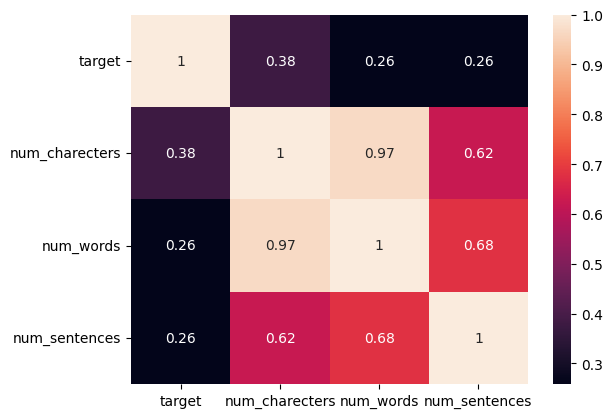

In [36]:
sns.heatmap(df[['target','num_charecters','num_words','num_sentences']].corr(),annot=True)

3.Data preprocessing

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tailo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
ps=PorterStemmer()

In [40]:
def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for j in message:
        y.append(ps.stem(j))
    
            
    return " ".join(y)



In [41]:
transform_text("i am talking to you")

'talk'

In [42]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
2919,0,"Thanx 4 the time weåÕve spent 2geva, its bin m...",86,23,2
933,0,What time you think you'll have it? Need to kn...,77,18,2
4064,0,Dont kick coco when he's down,29,7,1
1689,0,Bring tat cd don forget,23,5,1
1008,0,"Poyyarikatur,kolathupalayam,unjalur post,erode...",63,18,1


In [43]:
df['transform_text']=df['message'].apply(transform_text)

In [44]:
df.head()

,target,message,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------------ ------------------------- 102.4/301.4 kB 653.6 kB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

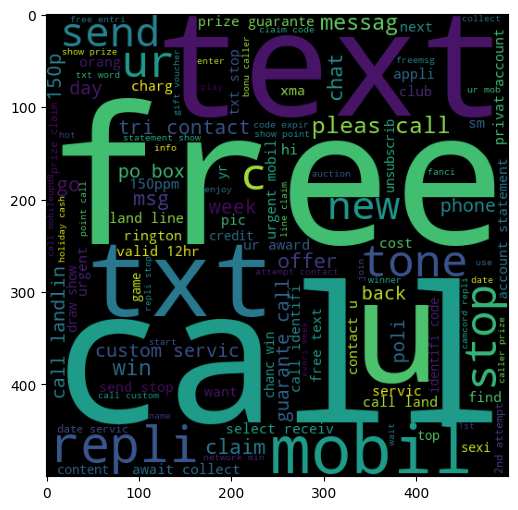

In [47]:
#spam messages display
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

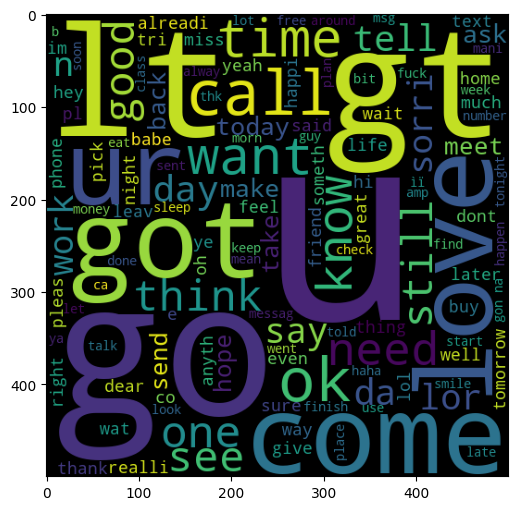

In [48]:
#ham messages display
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences,transform_text
2904,0,Ha. You donÛ÷t know either. I did a a clever ...,111,25,3,ha know either clever simpl thing pear day per...
1564,0,Tmrw. Im finishing 9 doors,26,6,2,tmrw im finish 9 door
625,0,"Haha good to hear, I'm officially paid and on ...",67,16,1,haha good hear offici paid market 8th
2275,0,Is that on the telly? No its Brdget Jones!,42,11,2,telli brdget jone
3847,0,Can you plz tell me the ans. BSLVYL sent via f...,58,12,2,plz tell an bslvyl sent via


In [50]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
len(spam_corpus)

9959

In [51]:
from collections import Counter

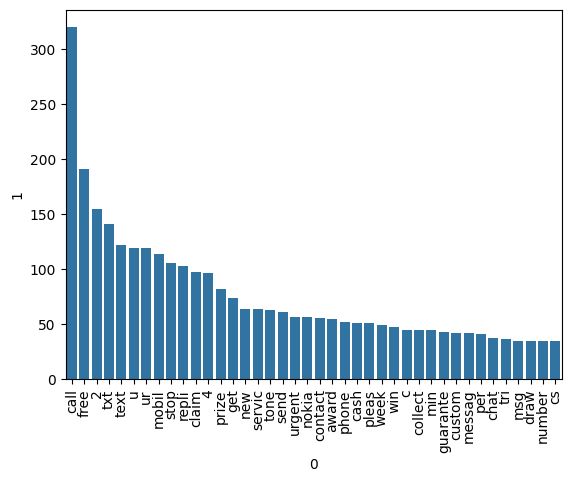

In [52]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35758

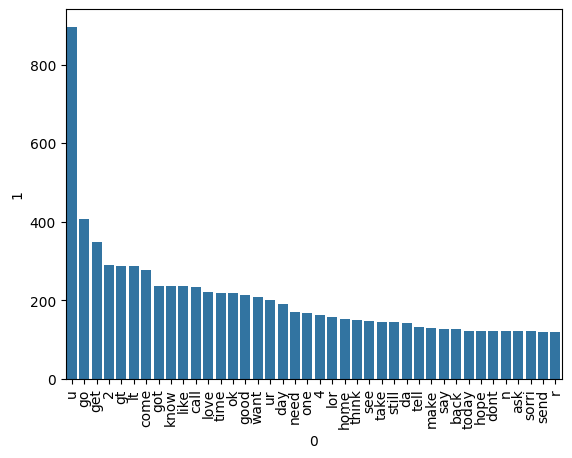

In [54]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(40))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [56]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [58]:
x.shape

(5171, 3000)

In [59]:
y=df['target'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [65]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8714975845410629
[[792 111]
 [ 22 110]]
0.497737556561086


In [66]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.978743961352657
[[897   6]
 [ 16 116]]
0.9508196721311475


Importing Pickle

In [67]:
import pickle
pickle.dump(tfidf,open('tfidfvectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))